In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
#Read the data
tc= pd.read_csv("C:\\Users\\DELL\\Downloads\\ToyotaCorolla.csv",encoding= 'unicode_escape')
tc.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
number=LabelEncoder()
tc['Model']=number.fit_transform(tc['Model'])
tc['Fuel_Type']=number.fit_transform(tc['Fuel_Type'])
tc['Model'].value_counts()
tc['Fuel_Type'].value_counts()
tc['tcColor']=number.fit_transform(tc['Color'])
tc['Color'].value_counts()


Grey      301
Blue      283
Red       278
Green     220
Black     191
Silver    122
White      31
Violet      4
Beige       3
Yellow      3
Name: Color, dtype: int64

In [4]:
tc.isna().sum()
# No null values

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
tcColor             0
dtype: int64

In [5]:
tc.drop('Id',axis=1,inplace=True)
tc.head()


,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,tcColor
0,257,13500,23,10,2002,46986,1,90,1,Blue,...,1,1,0,0,0,1,0,0,0,2
1,257,13750,23,10,2002,72937,1,90,1,Silver,...,0,1,0,0,0,1,0,0,0,6
2,365,13950,24,9,2002,41711,1,90,1,Blue,...,0,1,0,0,0,1,0,0,0,2
3,257,14950,26,7,2002,48000,1,90,0,Black,...,0,1,0,0,0,1,0,0,0,1
4,256,13750,30,3,2002,38500,1,90,0,Black,...,1,1,0,1,0,1,0,0,0,1


In [6]:
tc.drop('Airbag_1',axis=1,inplace=True)
tc.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,tcColor
0,257,13500,23,10,2002,46986,1,90,1,Blue,...,1,1,0,0,0,1,0,0,0,2
1,257,13750,23,10,2002,72937,1,90,1,Silver,...,0,1,0,0,0,1,0,0,0,6
2,365,13950,24,9,2002,41711,1,90,1,Blue,...,0,1,0,0,0,1,0,0,0,2
3,257,14950,26,7,2002,48000,1,90,0,Black,...,0,1,0,0,0,1,0,0,0,1
4,256,13750,30,3,2002,38500,1,90,0,Black,...,1,1,0,1,0,1,0,0,0,1


In [7]:
tc.drop('Power_Steering',axis=1,inplace=True)
tc.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,tcColor
0,257,13500,23,10,2002,46986,1,90,1,Blue,...,1,1,0,0,0,1,0,0,0,2
1,257,13750,23,10,2002,72937,1,90,1,Silver,...,1,0,0,0,0,1,0,0,0,6
2,365,13950,24,9,2002,41711,1,90,1,Blue,...,0,0,0,0,0,1,0,0,0,2
3,257,14950,26,7,2002,48000,1,90,0,Black,...,0,0,0,0,0,1,0,0,0,1
4,256,13750,30,3,2002,38500,1,90,0,Black,...,1,1,0,1,0,1,0,0,0,1


In [8]:
tc.drop('Cylinders',axis=1,inplace=True)
tc.head()


,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,tcColor
0,257,13500,23,10,2002,46986,1,90,1,Blue,...,1,1,0,0,0,1,0,0,0,2
1,257,13750,23,10,2002,72937,1,90,1,Silver,...,1,0,0,0,0,1,0,0,0,6
2,365,13950,24,9,2002,41711,1,90,1,Blue,...,0,0,0,0,0,1,0,0,0,2
3,257,14950,26,7,2002,48000,1,90,0,Black,...,0,0,0,0,0,1,0,0,0,1
4,256,13750,30,3,2002,38500,1,90,0,Black,...,1,1,0,1,0,1,0,0,0,1


In [9]:
tc.drop('Gears',axis=1,inplace=True)
tc.head()


,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,tcColor
0,257,13500,23,10,2002,46986,1,90,1,Blue,...,1,1,0,0,0,1,0,0,0,2
1,257,13750,23,10,2002,72937,1,90,1,Silver,...,1,0,0,0,0,1,0,0,0,6
2,365,13950,24,9,2002,41711,1,90,1,Blue,...,0,0,0,0,0,1,0,0,0,2
3,257,14950,26,7,2002,48000,1,90,0,Black,...,0,0,0,0,0,1,0,0,0,1
4,256,13750,30,3,2002,38500,1,90,0,Black,...,1,1,0,1,0,1,0,0,0,1


In [10]:
tc.skew()

Model                0.893277
Price                1.703885
Age_08_04           -0.826702
Mfg_Month            0.290661
Mfg_Year             0.911304
KM                   1.015912
Fuel_Type           -2.849716
HP                   0.955836
Met_Color           -0.747029
Automatic            3.878197
cc                  27.431793
Doors               -0.076395
Quarterly_Tax        1.993834
Weight               3.108639
Mfr_Guarantee        0.368588
BOVAG_Guarantee     -2.589204
Guarantee_Period     5.838435
ABS                 -1.610303
Airbag_2            -0.996767
Airco               -0.033466
Automatic_airco      3.849562
Boardcomputer        0.902259
CD_Player            1.362712
Central_Lock        -0.324863
Powered_Windows     -0.250099
Radio                2.004439
Mistlamps            1.113561
Sport_Model          0.873060
Backseat_Divider    -1.285823
Metallic_Rim         1.465019
Radio_cassette       2.012363
Tow_Bar              0.992885
tcColor              0.298884
dtype: flo

In [11]:
x=tc.corr()
x[tc.corr()>0.5]

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,tcColor
Model,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,1.000000,NaN,NaN,0.885159,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_08_04,NaN,NaN,1.000000,NaN,NaN,0.505672,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mfg_Month,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mfg_Year,NaN,0.885159,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM,NaN,NaN,0.505672,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Met_Color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
x[tc.corr()< -0.5]

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,tcColor
Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,NaN,-0.876590,NaN,NaN,-0.569960,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_08_04,NaN,-0.87659,NaN,NaN,-0.983661,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mfg_Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mfg_Year,NaN,NaN,-0.983661,NaN,NaN,-0.504974,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM,NaN,-0.56996,NaN,NaN,-0.504974,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Met_Color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Mfg_Year+Age_08_04+Boardcomputer+Automatic_airco+KM+Weight',data=tc).fit()
model.summary()                

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1781.
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:47:08   Log-Likelihood:                -12272.
No. Observations:                1436   AIC:                         2.456e+04
Df Residuals:                    1429   BIC:                         2.460e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -2.33e+06   2.42e+05     -9.635      0.000    -2.8e+06   -1.86e+06
Mfg_Year         1164.0244    120.689      9.645      0.000     927.278    1400.771
Age_08_04         -24.6492      9.921     -2.485      0.013     -44.110      -5.189
Boardcomputer    -228.9094    105.485     -2.170      0.030    -435.832     -21.987
Automatic_airco  2814.1669    167.349     16.816      0.000    2485.890    3142.443
KM                 -0.0207      0.001    -19.292      0.000      -0.023      -0.019
Weight             14.6285      0.783     18.676      0.000      13.092      16.165
==============================================================================
Omnibus:                      235.330   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1930.162
Skew:                          -0.508   Prob(JB):                         0.00
Kurtosis:                       8.588   Cond. No.                     5.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

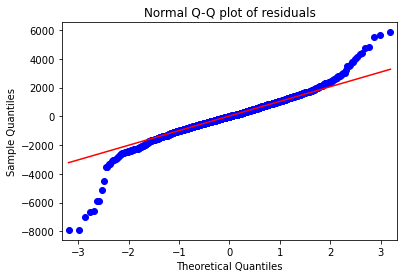

In [14]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [15]:
list(np.where(model.resid>20))

[array([   6,    7,    8,   10,   11,   12,   13,   14,   15,   16,   17,
          19,   20,   31,   32,   34,   35,   36,   38,   41,   43,   44,
          46,   47,   48,   49,   50,   51,   52,   53,   56,   57,   62,
          64,   66,   68,   69,   70,   72,   73,   74,   75,   76,   77,
          78,   81,   84,   87,   89,   90,   91,   94,   99,  102,  103,
         104,  105,  106,  107,  108,  109,  110,  111,  112,  113,  114,
         115,  118,  119,  120,  121,  125,  127,  138,  141,  143,  146,
         147,  149,  150,  152,  153,  154,  155,  157,  161,  162,  163,
         164,  167,  168,  169,  170,  171,  172,  173,  174,  176,  177,
         178,  179,  180,  181,  182,  190,  194,  195,  197,  205,  206,
         210,  211,  216,  219,  223,  225,  229,  230,  232,  233,  237,
         238,  241,  245,  247,  248,  253,  256,  259,  262,  271,  272,
         273,  274,  276,  278,  279,  280,  283,  289,  291,  294,  298,
         299,  302,  304,  307,  311, 

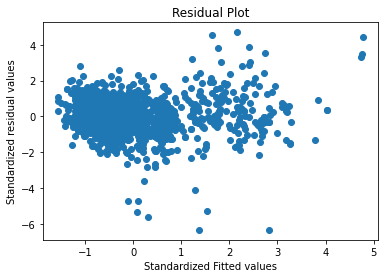

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

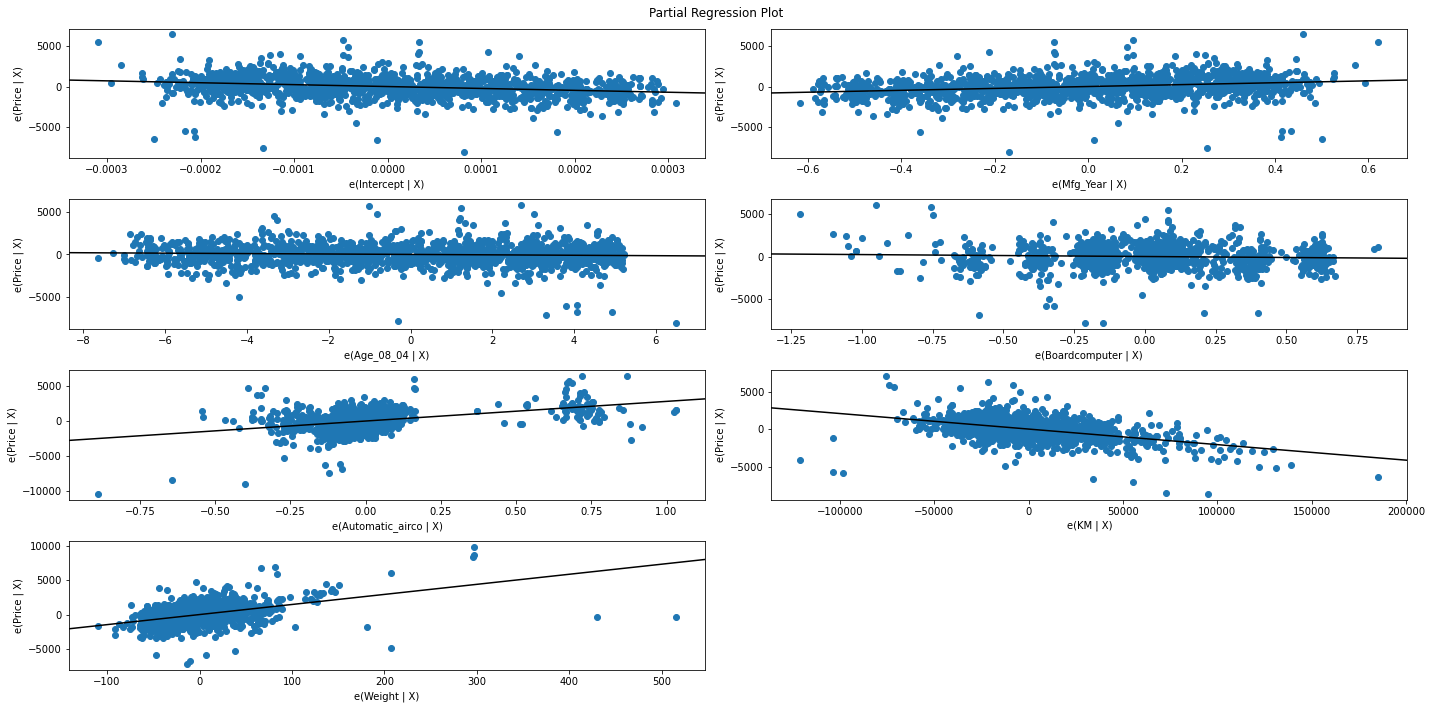

In [17]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

In [18]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-19-903dfa6db17a>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tc)), np.round(c, 3))


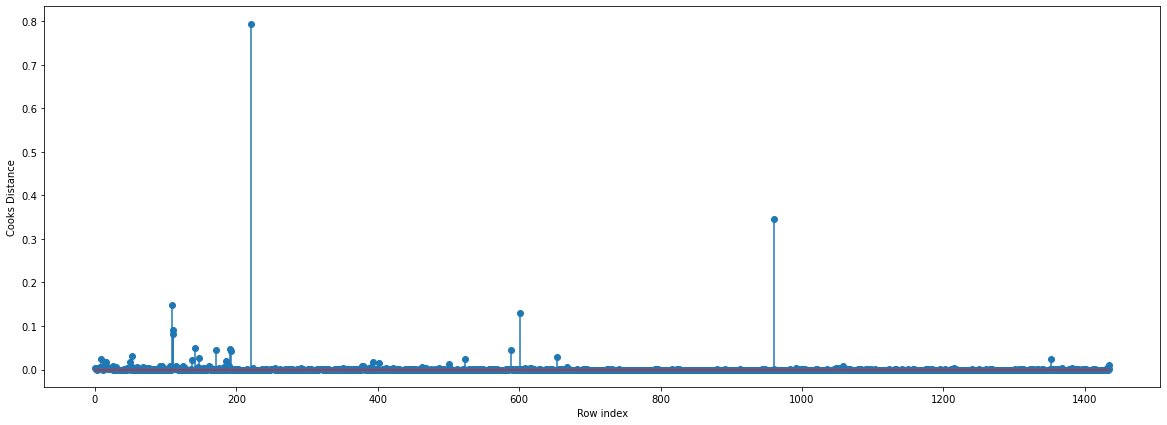

In [19]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [20]:
(np.argmax(c),np.max(c))

(221, 0.7947766415000163)

In [21]:
tc[tc.index.isin([221])]

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,tcColor
221,152,12450,44,1,2001,74172,2,110,1,Black,...,1,1,0,0,0,1,0,0,0,1


In [22]:
tc1=tc.drop(tc.index[[221]],axis=0).reset_index()
tc1=tc1.drop(['index'],axis=1)

final_model1= smf.ols('Price~Mfg_Year+Age_08_04+Boardcomputer+Automatic_airco+KM+Weight',data = tc1).fit()
final_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1845.
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:47:35   Log-Likelihood:                -12241.
No. Observations:                1435   AIC:                         2.450e+04
Df Residuals:                    1428   BIC:                         2.453e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.374e+06   2.38e+05     -9.969      0.000   -2.84e+06   -1.91e+06
Mfg_Year         1185.1086    118.854      9.971      0.000     951.962    1418.256
Age_08_04         -21.0070      9.781     -2.148      0.032     -40.194      -1.820
Boardcomputer    -238.3946    103.855     -2.295      0.022    -442.120     -34.669
Automatic_airco  2672.2314    166.059     16.092      0.000    2346.485    2997.978
KM                 -0.0214      0.001    -20.126      0.000      -0.023      -0.019
Weight             16.4304      0.815     20.156      0.000      14.831      18.029
==============================================================================
Omnibus:                      229.282   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1752.022
Skew:                          -0.511   Prob(JB):                         0.00
Kurtosis:                       8.316   Cond. No.                     5.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-23-0d6e84680804>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tc1)), np.round(c, 3))


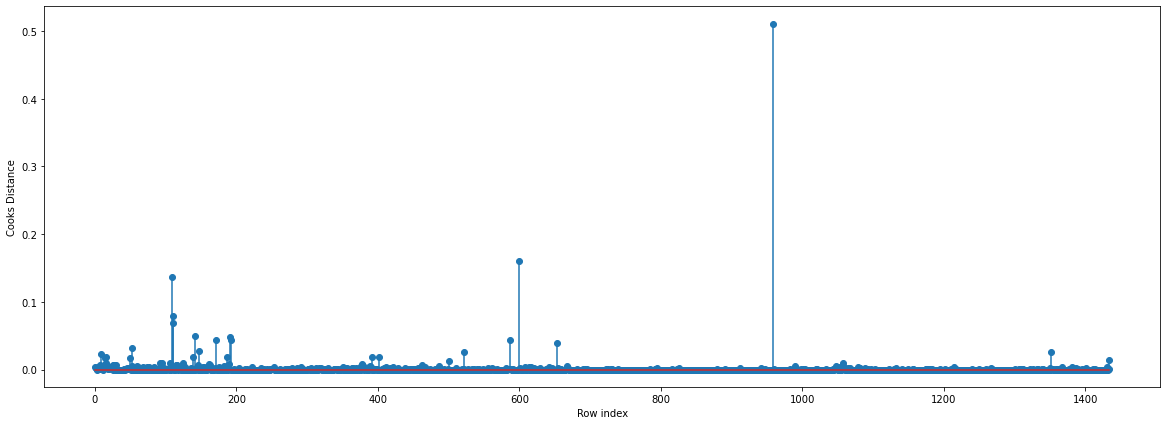

In [23]:
final_model1_influence = final_model1.get_influence()
(c, _) = final_model1_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
(np.argmax(c),np.max(c))

(959, 0.5113764737907044)

In [25]:
tc2=tc1.drop(tc1.index[[959]],axis=0).reset_index()
tc2=tc2.drop(['index'],axis=1)

final_model2= smf.ols('Price~Mfg_Year+Age_08_04+Boardcomputer+Automatic_airco+KM+Weight',data = tc2).fit()
final_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1902.
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:47:43   Log-Likelihood:                -12213.
No. Observations:                1434   AIC:                         2.444e+04
Df Residuals:                    1427   BIC:                         2.448e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.381e+06   2.35e+05    -10.137      0.000   -2.84e+06   -1.92e+06
Mfg_Year         1187.8899    117.244     10.132      0.000     957.902    1417.878
Age_08_04         -18.1729      9.659     -1.882      0.060     -37.120       0.774
Boardcomputer    -227.1518    102.463     -2.217      0.027    -428.146     -26.158
Automatic_airco  2566.4102    164.650     15.587      0.000    2243.429    2889.391
KM                 -0.0221      0.001    -21.005      0.000      -0.024      -0.020
Weight             17.9553      0.839     21.400      0.000      16.309      19.601
==============================================================================
Omnibus:                      211.436   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1524.545
Skew:                          -0.465   Prob(JB):                         0.00
Kurtosis:                       7.965   Cond. No.                     5.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-26-2b21798108e9>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tc2)), np.round(c, 3))


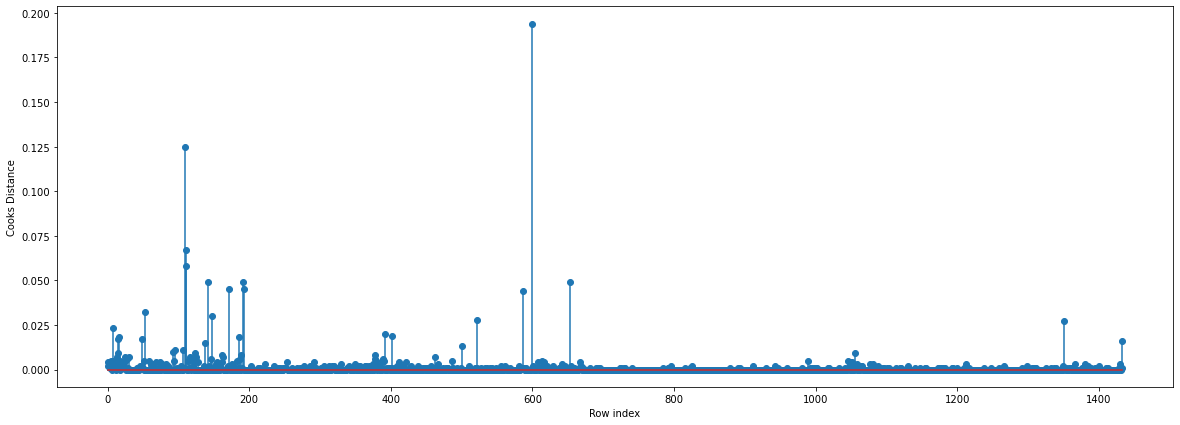

In [26]:
final_model2_influence = final_model2.get_influence()
(c, _) = final_model2_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c),np.max(c))

(600, 0.19381596431134762)

In [28]:
tc3=tc2.drop(tc2.index[[600]],axis=0).reset_index()
tc3=tc3.drop(['index'],axis=1)

final_model3= smf.ols('Price~Mfg_Year+Age_08_04+Boardcomputer+Automatic_airco+KM+Weight',data = tc3).fit()
final_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1980.
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:47:52   Log-Likelihood:                -12179.
No. Observations:                1433   AIC:                         2.437e+04
Df Residuals:                    1426   BIC:                         2.441e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.357e+06   2.31e+05    -10.214      0.000   -2.81e+06    -1.9e+06
Mfg_Year         1175.0940    115.155     10.204      0.000     949.203    1400.984
Age_08_04         -18.0214      9.486     -1.900      0.058     -36.629       0.586
Boardcomputer    -240.4041    100.642     -2.389      0.017    -437.826     -42.982
Automatic_airco  2491.0150    162.025     15.374      0.000    2173.182    2808.848
KM                 -0.0229      0.001    -22.003      0.000      -0.025      -0.021
Weight             18.8376      0.833     22.621      0.000      17.204      20.471
==============================================================================
Omnibus:                      141.208   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              777.372
Skew:                          -0.267   Prob(JB):                    1.57e-169
Kurtosis:                       6.568   Cond. No.                     5.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-32-de4986c3d503>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tc3)), np.round(c, 3))


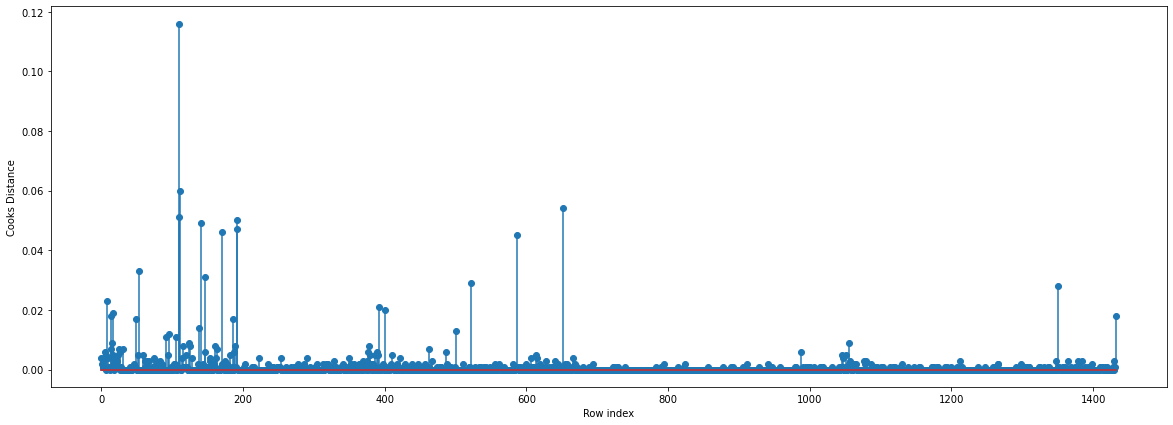

In [32]:
final_model3_influence = final_model3.get_influence()
(c, _) = final_model3_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
(np.argmax(c),np.max(c))

(109, 0.11646156320652402)

In [34]:
tc4=tc3.drop(tc3.index[[109]],axis=0).reset_index()
tc4=tc4.drop(['index'],axis=1)

final_model4= smf.ols('Price~Mfg_Year+Age_08_04+Boardcomputer+Automatic_airco+KM+Weight',data = tc4).fit()
final_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1944.
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:49:06   Log-Likelihood:                -12164.
No. Observations:                1432   AIC:                         2.434e+04
Df Residuals:                    1425   BIC:                         2.438e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.361e+06    2.3e+05    -10.278      0.000   -2.81e+06   -1.91e+06
Mfg_Year         1177.5729    114.651     10.271      0.000     952.671    1402.475
Age_08_04         -18.5970      9.445     -1.969      0.049     -37.125      -0.069
Boardcomputer    -242.8832    100.202     -2.424      0.015    -439.442     -46.324
Automatic_airco  2487.9024    161.315     15.423      0.000    2171.461    2804.344
KM                 -0.0226      0.001    -21.725      0.000      -0.025      -0.021
Weight             18.1811      0.848     21.440      0.000      16.518      19.845
==============================================================================
Omnibus:                      141.658   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.677
Skew:                          -0.266   Prob(JB):                    1.50e-171
Kurtosis:                       6.592   Cond. No.                     5.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### New model is build with improved r squared value as 0.891

## Training and Testing 

In [38]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(tc4,test_size=0.17)

In [39]:
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2)/tc4.shape[0])


In [40]:
train_model=smf.ols('Price~Mfg_Year+Age_08_04+Boardcomputer+Automatic_airco+KM+Weight',data = train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Price
errors=predtrain-actualtrain
rmse_train=RMSE(predtrain,actualtrain)
rmse_train

31.329992819851256

In [41]:
predtest=train_model.predict(test_data)
actualtest=test_data.Price
errors=predtest-actualtest
rmse_test=RMSE(predtest,actualtest)
rmse_test

31.00931113133062

### Training RMSE and Testing RMSE are equal so it is good model